# Q1 Regression Methods

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

## Q1.1 Processing stock pirce data in Python

### Q1.1.1 Import

In [99]:
px = pd.read_csv("priceData.csv").set_index('date').dropna()
dates = px.index
date_axis = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in dates]
logpx = np.log(px)

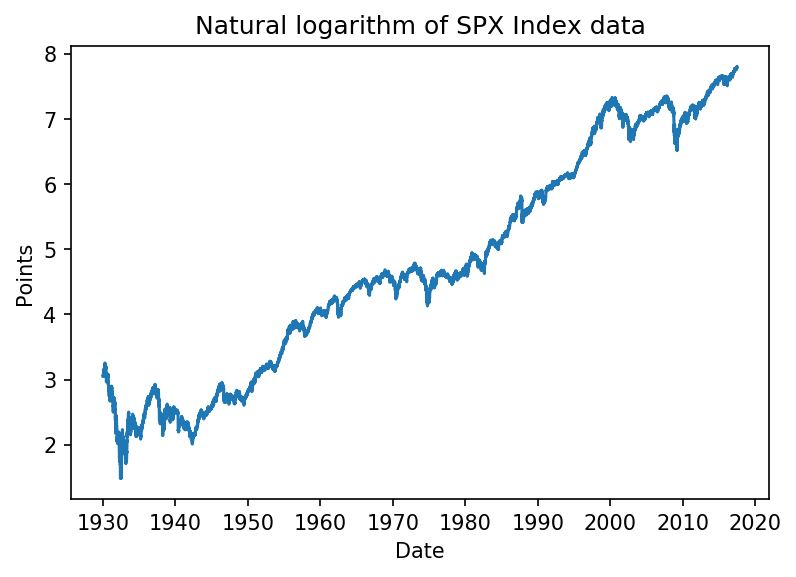

In [100]:
plt.figure(dpi=150)
plt.plot(date_axis,logpx)
plt.title('Natural logarithm of SPX Index data')
plt.xlabel('Date')
plt.ylabel('Points')
plt.show()

### Q1.1.2

In [42]:
WINDOW_SZ = 252

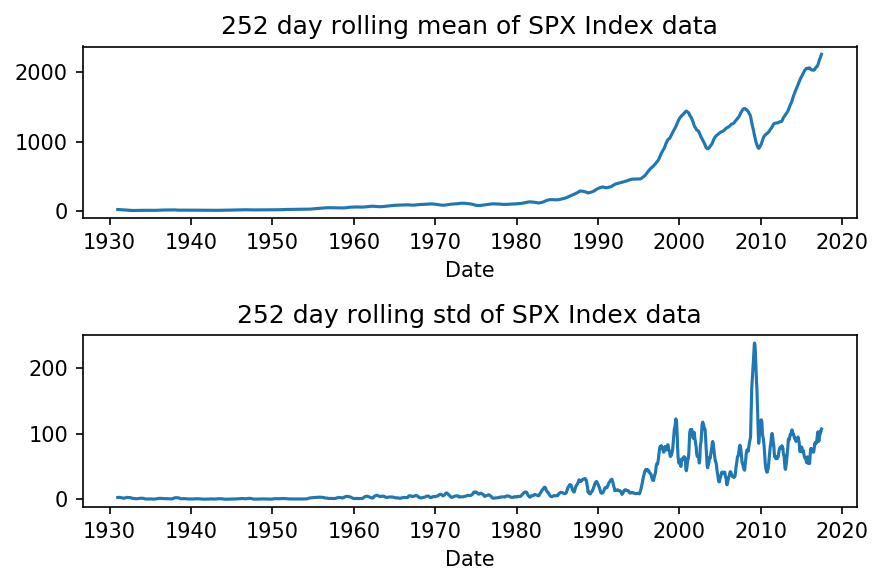

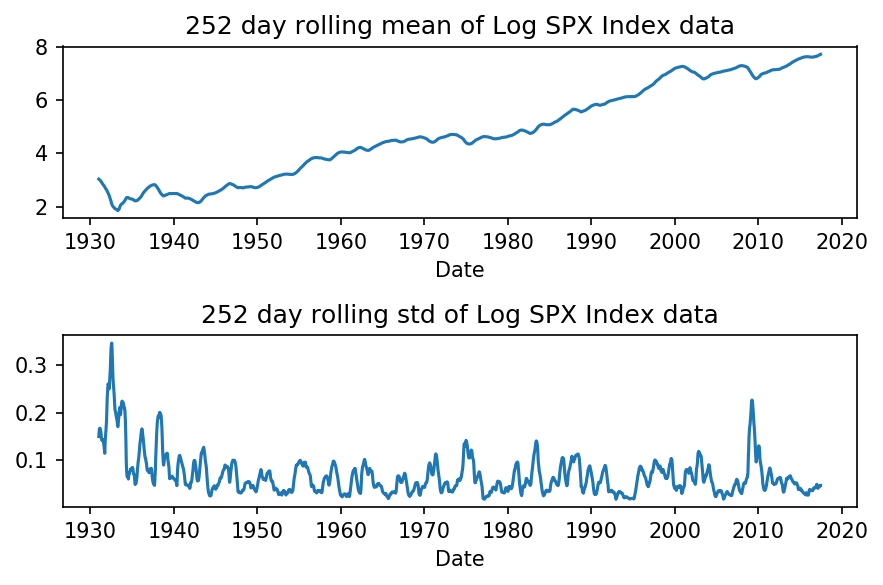

In [53]:
plt.figure(dpi=150)
plt.subplot(211)
plt.title('252 day rolling mean of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,px.rolling(WINDOW_SZ).mean())
# Sliding standard deviation
plt.subplot(212)
plt.plot(date_axis,px.rolling(WINDOW_SZ).std())
plt.title('252 day rolling std of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()
# Log Sliding mean
plt.figure(dpi=150)
plt.subplot(211)
plt.plot(date_axis,logpx.rolling(WINDOW_SZ).mean())
plt.title('252 day rolling mean of Log SPX Index data')
plt.xlabel('Date')
# Log Sliding standard deviation
plt.subplot(212)
plt.plot(date_axis,logpx.rolling(WINDOW_SZ).std())
plt.title('252 day rolling std of Log SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

#### Stationarity of time-series

trended mean supports that price-time series is non stationary

### Q1.1.3

In [54]:
# log return
logret = logpx.diff()

# simple return
simpret = px.pct_change()

#### Sliding statistics of log returns

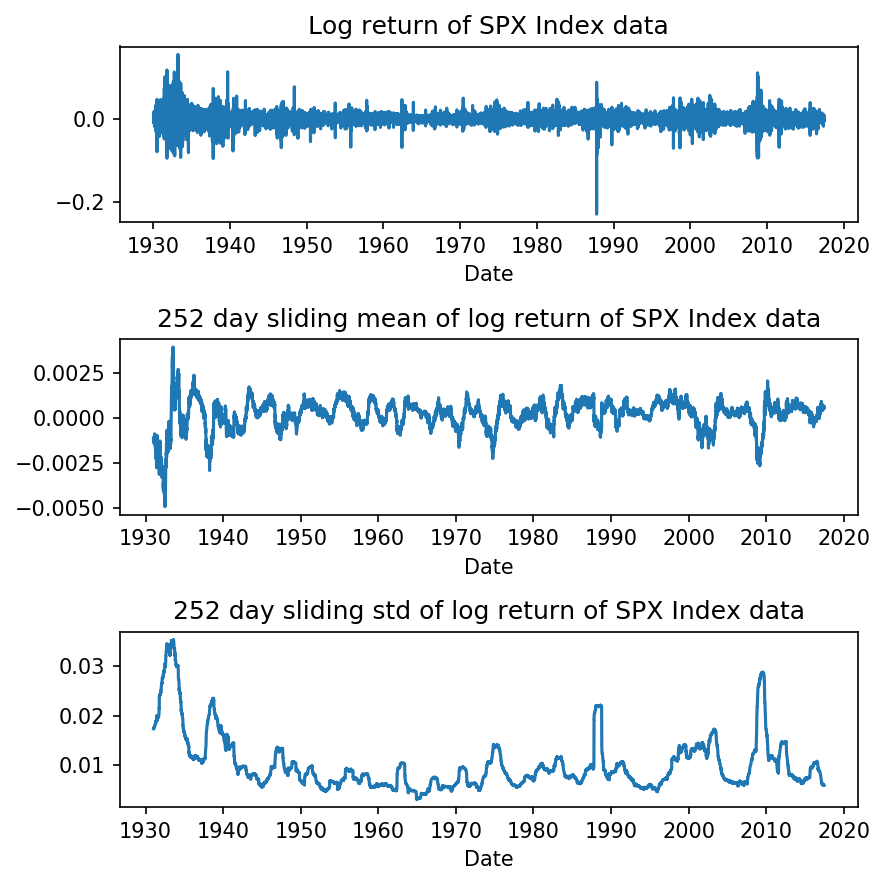

In [58]:
# Log returns
plt.figure(dpi=150, figsize=(6,6))
plt.subplot(311)
plt.plot(date_axis,logret)
plt.title('Log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
# Sliding mean Log return
plt.subplot(312)
logret_roll_mean = logret.rolling(WINDOW_SZ).mean()
plt.plot(date_axis,logret_roll_mean)
plt.title('252 day sliding mean of log return of SPX Index data')
plt.xlabel('Date')
5
plt.tight_layout()
# Sliding var Log return
plt.subplot(313)
logret_roll_var = logret.rolling(WINDOW_SZ).std()
plt.plot(date_axis,logret_roll_var)
plt.title('252 day sliding std of log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

#### Sliding statistics of simple returns

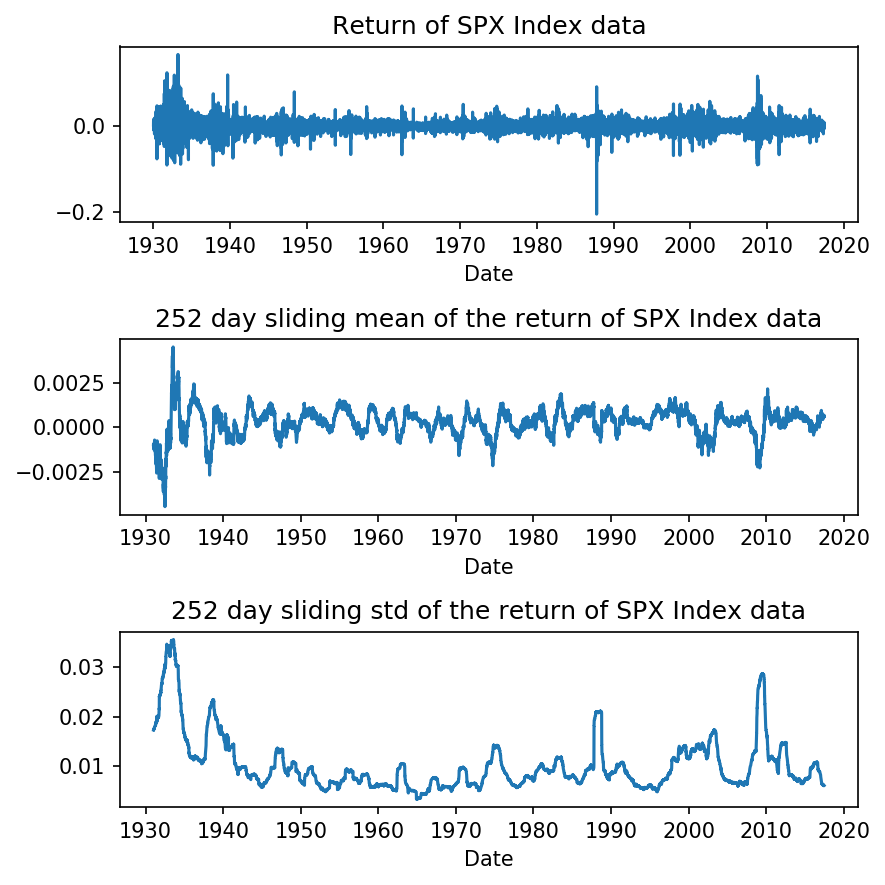

In [73]:
# Simple return
plt.figure(dpi=150, figsize=(6,6))
plt.subplot(311)
plt.title('Return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret)
plt.tight_layout()
# Sliding mean simple return
plt.subplot(312)
simpret_roll_mean = simpret.rolling(WINDOW_SZ).mean()
plt.title('252 day sliding mean of the return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret_roll_mean)
plt.tight_layout()
# Sliding variance simple return
plt.subplot(313)
simpret_roll_var = simpret.rolling(WINDOW_SZ).std()
plt.title('252 day sliding std of the return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret_roll_var)
plt.tight_layout()

both log and simple returns are stationary, unlike price time-series

### Q1.1.4

##### Suitability of log returns over simple returns for SP purposes

In [91]:
# Jarque-Bera test for Gaussianity
from scipy import stats

print("JB p-value for log price: {}".format(stats.jarque_bera(logpx[1:])[1]))
print("JB p-value for log returns: {}".format(stats.jarque_bera(logret[1:])[1]))
print("JB p-value for simple returns: {}".format(stats.jarque_bera(simpret[1:])[1]))

JB p-value for log price: 0.0
JB p-value for log returns: 0.0
JB p-value for simple returns: 0.0


returns are not normall dist - data does not fit normal distibution - sharper - Laplacian

### Q1.1.5

In [113]:
data = {'prices': [1, 2, 1]}
price_df = pd.DataFrame(data, columns=['prices'])
simple_ret = price_df.pct_change()
log_ret = np.log(price_df).diff()
# correct for missing first return
simple_ret.prices[0] = 0
log_ret.prices[0] = 0

print("The simple returns: {}".format(list(simple_ret.prices)))
print("The simple returns give a total return of: {}".format(sum(simple_ret.prices)))

print("The log returns: {}".format(list(log_ret.prices)))
print("The log returns give a total return of: {}".format(sum(log_ret.prices)))

The simple returns: [0.0, 1.0, -0.5]
The simple returns give a total return of: 0.5
The log returns: [0.0, 0.6931471805599453, -0.6931471805599453]
The log returns give a total return of: 0.0


### Q1.1.6

When should you not use log returns over simple returns?

## Q1.2 ARMA vs ARIMA Models for Financial Applications

### Q1.2.1

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
import copy

In [15]:
snp = pd.read_csv("snp_500_2015_2019.csv").set_index(['Date'])
snp_close = snp['Close'].to_frame().apply(np.log)
snp_close.head()

,Close
Date,
2015-01-02,7.629587
2015-01-05,7.611140
2015-01-06,7.602207
2015-01-07,7.613769
2015-01-08,7.631500


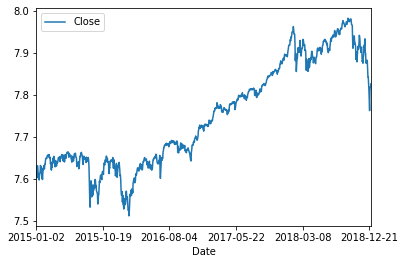

In [16]:
snp_close.plot()

ARMA not suitable as snp is non-stationary - ARIMA more suitable

### Q1.2.2

In [17]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
snp_arma['Res'] = ARIMA(snp_arma, order=(1,0,0)).fit().resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

/home/mehedi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


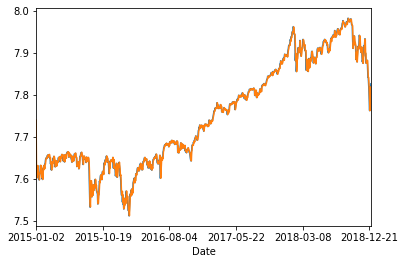

In [18]:
plt.figure()
snp_arma['True'].plot()
snp_arma['Prediction'].plot()
plt.show()

### Q1.2.3

In [19]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']
snp_arima['Res'] = ARIMA(snp_arima, order=(1,1,0)).fit().resid
snp_arima['Prediction'] = snp_arima['True'] - snp_arima['Res']

/home/mehedi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mehedi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


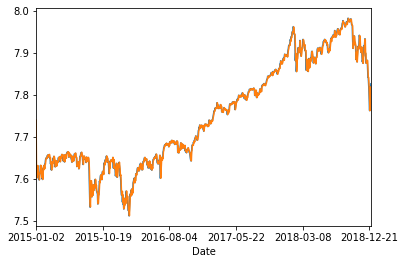

In [20]:
plt.figure()
snp_arma['True'].plot()
snp_arma['Prediction'].plot()
plt.show()

### Q1.2.4

why is taking hte log of the prices neccesary for ARIMA

## Q1.3